In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e11/sample_submission.csv
/kaggle/input/playground-series-s4e11/train.csv
/kaggle/input/playground-series-s4e11/test.csv


In [2]:
data = pd.read_csv("/kaggle/input/playground-series-s4e11/train.csv")

In [3]:
data['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

In [4]:
data2 = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')

In [5]:
data2

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
93796,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
93797,234497,Rishi,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No
93798,234498,Eshita,Female,23.0,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes


In [6]:
columns = list(data.columns)
columns[15]

'Have you ever had suicidal thoughts ?'

In [7]:
# Get the current column names
columns = list(data.columns)

# Rename the column at index 1 (second column)
columns[15] = "suicide_thought"  # Update the column name
data.columns = columns  # Reassign the modified column names


In [8]:
data1= data

In [9]:
data1

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [10]:
data1["Gender"] = data1["Gender"].map({"Male": 0, "Female": 1})

In [11]:
data1["Working Professional or Student"] = data1["Working Professional or Student"].map({
    "Student": 0,
    "Working Professional": 1
})


In [12]:
data1

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,1,49.0,Ludhiana,1,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,0,26.0,Varanasi,1,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,0,33.0,Visakhapatnam,0,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,0,22.0,Mumbai,1,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,1,30.0,Kanpur,1,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,1,18.0,Ahmedabad,1,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,1,41.0,Hyderabad,1,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,1,24.0,Kolkata,1,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,1,49.0,Srinagar,1,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [13]:
data1.drop(columns=['Name'])
data1.drop(columns=['Profession'])

,id,Name,Gender,Age,City,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,1,49.0,Ludhiana,1,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,0,26.0,Varanasi,1,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,0,33.0,Visakhapatnam,0,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,0,22.0,Mumbai,1,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,1,30.0,Kanpur,1,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,1,18.0,Ahmedabad,1,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,1,41.0,Hyderabad,1,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,1,24.0,Kolkata,1,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,1,49.0,Srinagar,1,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [14]:
# Calculate mode of the column
mode_value = data1["Academic Pressure"].mode()[0]

# Replace NaN with the mode
data1["Academic Pressure"].fillna(mode_value, inplace=True)

print(data1)

            id      Name  Gender   Age           City  \
0            0  Aaradhya       1  49.0       Ludhiana   
1            1     Vivan       0  26.0       Varanasi   
2            2    Yuvraj       0  33.0  Visakhapatnam   
3            3    Yuvraj       0  22.0         Mumbai   
4            4      Rhea       1  30.0         Kanpur   
...        ...       ...     ...   ...            ...   
140695  140695     Vidya       1  18.0      Ahmedabad   
140696  140696      Lata       1  41.0      Hyderabad   
140697  140697   Aanchal       1  24.0        Kolkata   
140698  140698    Prachi       1  49.0       Srinagar   
140699  140699       Sai       0  27.0          Patna   

        Working Professional or Student         Profession  Academic Pressure  \
0                                     1               Chef                3.0   
1                                     1            Teacher                3.0   
2                                     0                NaN              

In [15]:
# Calculate the mode of the 'CGPA Range' column, excluding NaN values
mean_cgpa = data1['CGPA'].mean()

# Fill NaN values in 'CGPA Range' with the calculated mode
data1['CGPA'].fillna(mean_cgpa, inplace=True)

print(data1)


            id      Name  Gender   Age           City  \
0            0  Aaradhya       1  49.0       Ludhiana   
1            1     Vivan       0  26.0       Varanasi   
2            2    Yuvraj       0  33.0  Visakhapatnam   
3            3    Yuvraj       0  22.0         Mumbai   
4            4      Rhea       1  30.0         Kanpur   
...        ...       ...     ...   ...            ...   
140695  140695     Vidya       1  18.0      Ahmedabad   
140696  140696      Lata       1  41.0      Hyderabad   
140697  140697   Aanchal       1  24.0        Kolkata   
140698  140698    Prachi       1  49.0       Srinagar   
140699  140699       Sai       0  27.0          Patna   

        Working Professional or Student         Profession  Academic Pressure  \
0                                     1               Chef                3.0   
1                                     1            Teacher                3.0   
2                                     0                NaN              

In [16]:


# Define bins and labels
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = ["1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8", "8-9", "9-10"]

# Create a new column with binned ranges
data1["CGPA Range"] = pd.cut(data1["CGPA"], bins=bins, labels=labels, right=False)

print(data1)

            id      Name  Gender   Age           City  \
0            0  Aaradhya       1  49.0       Ludhiana   
1            1     Vivan       0  26.0       Varanasi   
2            2    Yuvraj       0  33.0  Visakhapatnam   
3            3    Yuvraj       0  22.0         Mumbai   
4            4      Rhea       1  30.0         Kanpur   
...        ...       ...     ...   ...            ...   
140695  140695     Vidya       1  18.0      Ahmedabad   
140696  140696      Lata       1  41.0      Hyderabad   
140697  140697   Aanchal       1  24.0        Kolkata   
140698  140698    Prachi       1  49.0       Srinagar   
140699  140699       Sai       0  27.0          Patna   

        Working Professional or Student         Profession  Academic Pressure  \
0                                     1               Chef                3.0   
1                                     1            Teacher                3.0   
2                                     0                NaN              

In [17]:
data1.drop(columns = ['CGPA'])


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA Range
0,0,Aaradhya,1,49.0,Ludhiana,1,Chef,3.0,5.0,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,7-8
1,1,Vivan,0,26.0,Varanasi,1,Teacher,3.0,4.0,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,7-8
2,2,Yuvraj,0,33.0,Visakhapatnam,0,NaN,5.0,NaN,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,8-9
3,3,Yuvraj,0,22.0,Mumbai,1,Teacher,3.0,5.0,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,7-8
4,4,Rhea,1,30.0,Kanpur,1,Business Analyst,3.0,1.0,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,7-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,1,18.0,Ahmedabad,1,NaN,3.0,5.0,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1,7-8
140696,140696,Lata,1,41.0,Hyderabad,1,Content Writer,3.0,5.0,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0,7-8
140697,140697,Aanchal,1,24.0,Kolkata,1,Marketing Manager,3.0,3.0,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0,7-8
140698,140698,Prachi,1,49.0,Srinagar,1,Plumber,3.0,5.0,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0,7-8


In [18]:
data1['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

In [19]:
# Calculate mode of the column
median_value = data1["Study Satisfaction"].median()

# Replace NaN with the mode
data1["Study Satisfaction"].fillna(median_value, inplace=True)

print(data1)

            id      Name  Gender   Age           City  \
0            0  Aaradhya       1  49.0       Ludhiana   
1            1     Vivan       0  26.0       Varanasi   
2            2    Yuvraj       0  33.0  Visakhapatnam   
3            3    Yuvraj       0  22.0         Mumbai   
4            4      Rhea       1  30.0         Kanpur   
...        ...       ...     ...   ...            ...   
140695  140695     Vidya       1  18.0      Ahmedabad   
140696  140696      Lata       1  41.0      Hyderabad   
140697  140697   Aanchal       1  24.0        Kolkata   
140698  140698    Prachi       1  49.0       Srinagar   
140699  140699       Sai       0  27.0          Patna   

        Working Professional or Student         Profession  Academic Pressure  \
0                                     1               Chef                3.0   
1                                     1            Teacher                3.0   
2                                     0                NaN              

In [20]:
# Calculate mode of the column
median_value1 = data1["Job Satisfaction"].median()

# Replace NaN with the mode
data1["Job Satisfaction"].fillna(median_value1, inplace=True)

print(data1)

            id      Name  Gender   Age           City  \
0            0  Aaradhya       1  49.0       Ludhiana   
1            1     Vivan       0  26.0       Varanasi   
2            2    Yuvraj       0  33.0  Visakhapatnam   
3            3    Yuvraj       0  22.0         Mumbai   
4            4      Rhea       1  30.0         Kanpur   
...        ...       ...     ...   ...            ...   
140695  140695     Vidya       1  18.0      Ahmedabad   
140696  140696      Lata       1  41.0      Hyderabad   
140697  140697   Aanchal       1  24.0        Kolkata   
140698  140698    Prachi       1  49.0       Srinagar   
140699  140699       Sai       0  27.0          Patna   

        Working Professional or Student         Profession  Academic Pressure  \
0                                     1               Chef                3.0   
1                                     1            Teacher                3.0   
2                                     0                NaN              

In [21]:
data1["Sleep Duration"] = data1["Sleep Duration"].apply(
    lambda x: x if isinstance(x, str) and 'hours' in x and any(char.isdigit() for char in x) else np.nan
)

In [22]:
data1

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA Range
0,0,Aaradhya,1,49.0,Ludhiana,1,Chef,3.0,5.0,7.658636,...,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,7-8
1,1,Vivan,0,26.0,Varanasi,1,Teacher,3.0,4.0,7.658636,...,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,7-8
2,2,Yuvraj,0,33.0,Visakhapatnam,0,NaN,5.0,NaN,8.970000,...,3.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,8-9
3,3,Yuvraj,0,22.0,Mumbai,1,Teacher,3.0,5.0,7.658636,...,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,7-8
4,4,Rhea,1,30.0,Kanpur,1,Business Analyst,3.0,1.0,7.658636,...,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,7-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,1,18.0,Ahmedabad,1,NaN,3.0,5.0,7.658636,...,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1,7-8
140696,140696,Lata,1,41.0,Hyderabad,1,Content Writer,3.0,5.0,7.658636,...,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0,7-8
140697,140697,Aanchal,1,24.0,Kolkata,1,Marketing Manager,3.0,3.0,7.658636,...,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0,7-8
140698,140698,Prachi,1,49.0,Srinagar,1,Plumber,3.0,5.0,7.658636,...,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0,7-8


In [23]:
# Replace NaN values with mode
mode_value = data1['Sleep Duration'].mode()[0]  # Get the mode of the column
data1['Sleep Duration'].fillna(mode_value, inplace=True)  

In [24]:
import re
def extract_numbers(value):
    numbers = re.findall(r'\d+', str(value))  # Extract all numbers
    return ", ".join(numbers)  # Join multiple numbers with commas

# Apply function to the column
data1['Extracted Numbers'] = data1['Sleep Duration'].apply(extract_numbers)

# Display the result
print(data1)

            id      Name  Gender   Age           City  \
0            0  Aaradhya       1  49.0       Ludhiana   
1            1     Vivan       0  26.0       Varanasi   
2            2    Yuvraj       0  33.0  Visakhapatnam   
3            3    Yuvraj       0  22.0         Mumbai   
4            4      Rhea       1  30.0         Kanpur   
...        ...       ...     ...   ...            ...   
140695  140695     Vidya       1  18.0      Ahmedabad   
140696  140696      Lata       1  41.0      Hyderabad   
140697  140697   Aanchal       1  24.0        Kolkata   
140698  140698    Prachi       1  49.0       Srinagar   
140699  140699       Sai       0  27.0          Patna   

        Working Professional or Student         Profession  Academic Pressure  \
0                                     1               Chef                3.0   
1                                     1            Teacher                3.0   
2                                     0                NaN              

In [25]:
# Define the mode value for replacement
mode_numeric = data1['Extracted Numbers'].mode()[0]  # Get the mode of the extracted numbers

# Replace specific patterns with the mode value
values_to_replace = ['40, 45', '55, 66', '35, 36', '49', '45, 48']
data1['Extracted Numbers'] = data1['Extracted Numbers'].replace(values_to_replace, mode_numeric)

# Display the result
data1

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Sleep Duration,Dietary Habits,Degree,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA Range,Extracted Numbers
0,0,Aaradhya,1,49.0,Ludhiana,1,Chef,3.0,5.0,7.658636,...,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,7-8,8
1,1,Vivan,0,26.0,Varanasi,1,Teacher,3.0,4.0,7.658636,...,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,7-8,5
2,2,Yuvraj,0,33.0,Visakhapatnam,0,NaN,5.0,NaN,8.970000,...,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,8-9,"5, 6"
3,3,Yuvraj,0,22.0,Mumbai,1,Teacher,3.0,5.0,7.658636,...,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,7-8,5
4,4,Rhea,1,30.0,Kanpur,1,Business Analyst,3.0,1.0,7.658636,...,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,7-8,"5, 6"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,1,18.0,Ahmedabad,1,NaN,3.0,5.0,7.658636,...,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1,7-8,"5, 6"
140696,140696,Lata,1,41.0,Hyderabad,1,Content Writer,3.0,5.0,7.658636,...,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0,7-8,"7, 8"
140697,140697,Aanchal,1,24.0,Kolkata,1,Marketing Manager,3.0,3.0,7.658636,...,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0,7-8,8
140698,140698,Prachi,1,49.0,Srinagar,1,Plumber,3.0,5.0,7.658636,...,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0,7-8,"5, 6"


In [26]:
# Function to process 'Extracted Numbers' into ranges
def process_extracted_numbers(value):
    numbers = re.findall(r'\d+', str(value))  # Extract all numbers
    if len(numbers) == 1:
        num = int(numbers[0])
        return f"{num-1}-{num}" if num > 0 else f"0-{num}"  # Single number range
    elif len(numbers) > 1:
        return f"{numbers[0]}-{numbers[-1]}"  # Multiple numbers form a range
    else:
        return np.nan  # Handle cases with no numbers

# Apply the function to process the column
data1['Processed Numbers'] = data1['Extracted Numbers'].apply(process_extracted_numbers)

# Display the final DataFrame
print(data1)


            id      Name  Gender   Age           City  \
0            0  Aaradhya       1  49.0       Ludhiana   
1            1     Vivan       0  26.0       Varanasi   
2            2    Yuvraj       0  33.0  Visakhapatnam   
3            3    Yuvraj       0  22.0         Mumbai   
4            4      Rhea       1  30.0         Kanpur   
...        ...       ...     ...   ...            ...   
140695  140695     Vidya       1  18.0      Ahmedabad   
140696  140696      Lata       1  41.0      Hyderabad   
140697  140697   Aanchal       1  24.0        Kolkata   
140698  140698    Prachi       1  49.0       Srinagar   
140699  140699       Sai       0  27.0          Patna   

        Working Professional or Student         Profession  Academic Pressure  \
0                                     1               Chef                3.0   
1                                     1            Teacher                3.0   
2                                     0                NaN              

In [27]:
data1.rename(columns={'Processed Numbers': 'Processed Sleep Duration'}, inplace=True)


In [28]:
data1.drop(columns = ['Extracted Numbers'])


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Sleep Duration,Dietary Habits,Degree,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA Range,Processed Sleep Duration
0,0,Aaradhya,1,49.0,Ludhiana,1,Chef,3.0,5.0,7.658636,...,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,7-8,7-8
1,1,Vivan,0,26.0,Varanasi,1,Teacher,3.0,4.0,7.658636,...,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,7-8,4-5
2,2,Yuvraj,0,33.0,Visakhapatnam,0,NaN,5.0,NaN,8.970000,...,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,8-9,5-6
3,3,Yuvraj,0,22.0,Mumbai,1,Teacher,3.0,5.0,7.658636,...,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,7-8,4-5
4,4,Rhea,1,30.0,Kanpur,1,Business Analyst,3.0,1.0,7.658636,...,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,7-8,5-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,1,18.0,Ahmedabad,1,NaN,3.0,5.0,7.658636,...,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1,7-8,5-6
140696,140696,Lata,1,41.0,Hyderabad,1,Content Writer,3.0,5.0,7.658636,...,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0,7-8,7-8
140697,140697,Aanchal,1,24.0,Kolkata,1,Marketing Manager,3.0,3.0,7.658636,...,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0,7-8,7-8
140698,140698,Prachi,1,49.0,Srinagar,1,Plumber,3.0,5.0,7.658636,...,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0,7-8,5-6


In [29]:

data1.drop(columns = ['Sleep Duration'])

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Dietary Habits,Degree,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA Range,Extracted Numbers,Processed Sleep Duration
0,0,Aaradhya,1,49.0,Ludhiana,1,Chef,3.0,5.0,7.658636,...,Healthy,BHM,No,1.0,2.0,No,0,7-8,8,7-8
1,1,Vivan,0,26.0,Varanasi,1,Teacher,3.0,4.0,7.658636,...,Unhealthy,LLB,Yes,7.0,3.0,No,1,7-8,5,4-5
2,2,Yuvraj,0,33.0,Visakhapatnam,0,NaN,5.0,NaN,8.970000,...,Healthy,B.Pharm,Yes,3.0,1.0,No,1,8-9,"5, 6",5-6
3,3,Yuvraj,0,22.0,Mumbai,1,Teacher,3.0,5.0,7.658636,...,Moderate,BBA,Yes,10.0,1.0,Yes,1,7-8,5,4-5
4,4,Rhea,1,30.0,Kanpur,1,Business Analyst,3.0,1.0,7.658636,...,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,7-8,"5, 6",5-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,1,18.0,Ahmedabad,1,NaN,3.0,5.0,7.658636,...,Unhealthy,Class 12,No,2.0,4.0,Yes,1,7-8,"5, 6",5-6
140696,140696,Lata,1,41.0,Hyderabad,1,Content Writer,3.0,5.0,7.658636,...,Moderate,B.Tech,Yes,6.0,5.0,Yes,0,7-8,"7, 8",7-8
140697,140697,Aanchal,1,24.0,Kolkata,1,Marketing Manager,3.0,3.0,7.658636,...,Moderate,B.Com,No,4.0,4.0,No,0,7-8,8,7-8
140698,140698,Prachi,1,49.0,Srinagar,1,Plumber,3.0,5.0,7.658636,...,Moderate,ME,Yes,10.0,1.0,No,0,7-8,"5, 6",5-6


In [30]:
data1.drop(columns= ['Degree'])

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Sleep Duration,Dietary Habits,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA Range,Extracted Numbers,Processed Sleep Duration
0,0,Aaradhya,1,49.0,Ludhiana,1,Chef,3.0,5.0,7.658636,...,More than 8 hours,Healthy,No,1.0,2.0,No,0,7-8,8,7-8
1,1,Vivan,0,26.0,Varanasi,1,Teacher,3.0,4.0,7.658636,...,Less than 5 hours,Unhealthy,Yes,7.0,3.0,No,1,7-8,5,4-5
2,2,Yuvraj,0,33.0,Visakhapatnam,0,NaN,5.0,NaN,8.970000,...,5-6 hours,Healthy,Yes,3.0,1.0,No,1,8-9,"5, 6",5-6
3,3,Yuvraj,0,22.0,Mumbai,1,Teacher,3.0,5.0,7.658636,...,Less than 5 hours,Moderate,Yes,10.0,1.0,Yes,1,7-8,5,4-5
4,4,Rhea,1,30.0,Kanpur,1,Business Analyst,3.0,1.0,7.658636,...,5-6 hours,Unhealthy,Yes,9.0,4.0,Yes,0,7-8,"5, 6",5-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,1,18.0,Ahmedabad,1,NaN,3.0,5.0,7.658636,...,5-6 hours,Unhealthy,No,2.0,4.0,Yes,1,7-8,"5, 6",5-6
140696,140696,Lata,1,41.0,Hyderabad,1,Content Writer,3.0,5.0,7.658636,...,7-8 hours,Moderate,Yes,6.0,5.0,Yes,0,7-8,"7, 8",7-8
140697,140697,Aanchal,1,24.0,Kolkata,1,Marketing Manager,3.0,3.0,7.658636,...,More than 8 hours,Moderate,No,4.0,4.0,No,0,7-8,8,7-8
140698,140698,Prachi,1,49.0,Srinagar,1,Plumber,3.0,5.0,7.658636,...,5-6 hours,Moderate,Yes,10.0,1.0,No,0,7-8,"5, 6",5-6


In [31]:
data1['suicide_thought'] = data1['suicide_thought'].map({'Yes':1,'No' :0})

In [32]:
# Replace NaN values with mode
median2_value = data1['Financial Stress'].median() # Get the mode of the column
data1['Financial Stress'].fillna(median2_value, inplace=True)  

In [33]:
data1.drop(columns=['Degree'])

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Sleep Duration,Dietary Habits,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA Range,Extracted Numbers,Processed Sleep Duration
0,0,Aaradhya,1,49.0,Ludhiana,1,Chef,3.0,5.0,7.658636,...,More than 8 hours,Healthy,0,1.0,2.0,No,0,7-8,8,7-8
1,1,Vivan,0,26.0,Varanasi,1,Teacher,3.0,4.0,7.658636,...,Less than 5 hours,Unhealthy,1,7.0,3.0,No,1,7-8,5,4-5
2,2,Yuvraj,0,33.0,Visakhapatnam,0,NaN,5.0,NaN,8.970000,...,5-6 hours,Healthy,1,3.0,1.0,No,1,8-9,"5, 6",5-6
3,3,Yuvraj,0,22.0,Mumbai,1,Teacher,3.0,5.0,7.658636,...,Less than 5 hours,Moderate,1,10.0,1.0,Yes,1,7-8,5,4-5
4,4,Rhea,1,30.0,Kanpur,1,Business Analyst,3.0,1.0,7.658636,...,5-6 hours,Unhealthy,1,9.0,4.0,Yes,0,7-8,"5, 6",5-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,1,18.0,Ahmedabad,1,NaN,3.0,5.0,7.658636,...,5-6 hours,Unhealthy,0,2.0,4.0,Yes,1,7-8,"5, 6",5-6
140696,140696,Lata,1,41.0,Hyderabad,1,Content Writer,3.0,5.0,7.658636,...,7-8 hours,Moderate,1,6.0,5.0,Yes,0,7-8,"7, 8",7-8
140697,140697,Aanchal,1,24.0,Kolkata,1,Marketing Manager,3.0,3.0,7.658636,...,More than 8 hours,Moderate,0,4.0,4.0,No,0,7-8,8,7-8
140698,140698,Prachi,1,49.0,Srinagar,1,Plumber,3.0,5.0,7.658636,...,5-6 hours,Moderate,1,10.0,1.0,No,0,7-8,"5, 6",5-6


In [34]:
data1.drop(columns=['Profession'])

,id,Name,Gender,Age,City,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,...,Dietary Habits,Degree,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA Range,Extracted Numbers,Processed Sleep Duration
0,0,Aaradhya,1,49.0,Ludhiana,1,3.0,5.0,7.658636,3.0,...,Healthy,BHM,0,1.0,2.0,No,0,7-8,8,7-8
1,1,Vivan,0,26.0,Varanasi,1,3.0,4.0,7.658636,3.0,...,Unhealthy,LLB,1,7.0,3.0,No,1,7-8,5,4-5
2,2,Yuvraj,0,33.0,Visakhapatnam,0,5.0,NaN,8.970000,2.0,...,Healthy,B.Pharm,1,3.0,1.0,No,1,8-9,"5, 6",5-6
3,3,Yuvraj,0,22.0,Mumbai,1,3.0,5.0,7.658636,3.0,...,Moderate,BBA,1,10.0,1.0,Yes,1,7-8,5,4-5
4,4,Rhea,1,30.0,Kanpur,1,3.0,1.0,7.658636,3.0,...,Unhealthy,BBA,1,9.0,4.0,Yes,0,7-8,"5, 6",5-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,1,18.0,Ahmedabad,1,3.0,5.0,7.658636,3.0,...,Unhealthy,Class 12,0,2.0,4.0,Yes,1,7-8,"5, 6",5-6
140696,140696,Lata,1,41.0,Hyderabad,1,3.0,5.0,7.658636,3.0,...,Moderate,B.Tech,1,6.0,5.0,Yes,0,7-8,"7, 8",7-8
140697,140697,Aanchal,1,24.0,Kolkata,1,3.0,3.0,7.658636,3.0,...,Moderate,B.Com,0,4.0,4.0,No,0,7-8,8,7-8
140698,140698,Prachi,1,49.0,Srinagar,1,3.0,5.0,7.658636,3.0,...,Moderate,ME,1,10.0,1.0,No,0,7-8,"5, 6",5-6


In [35]:
data1.drop(columns=['City','Profession'])

,id,Name,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,...,Dietary Habits,Degree,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA Range,Extracted Numbers,Processed Sleep Duration
0,0,Aaradhya,1,49.0,1,3.0,5.0,7.658636,3.0,2.0,...,Healthy,BHM,0,1.0,2.0,No,0,7-8,8,7-8
1,1,Vivan,0,26.0,1,3.0,4.0,7.658636,3.0,3.0,...,Unhealthy,LLB,1,7.0,3.0,No,1,7-8,5,4-5
2,2,Yuvraj,0,33.0,0,5.0,NaN,8.970000,2.0,3.0,...,Healthy,B.Pharm,1,3.0,1.0,No,1,8-9,"5, 6",5-6
3,3,Yuvraj,0,22.0,1,3.0,5.0,7.658636,3.0,1.0,...,Moderate,BBA,1,10.0,1.0,Yes,1,7-8,5,4-5
4,4,Rhea,1,30.0,1,3.0,1.0,7.658636,3.0,1.0,...,Unhealthy,BBA,1,9.0,4.0,Yes,0,7-8,"5, 6",5-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,1,18.0,1,3.0,5.0,7.658636,3.0,4.0,...,Unhealthy,Class 12,0,2.0,4.0,Yes,1,7-8,"5, 6",5-6
140696,140696,Lata,1,41.0,1,3.0,5.0,7.658636,3.0,4.0,...,Moderate,B.Tech,1,6.0,5.0,Yes,0,7-8,"7, 8",7-8
140697,140697,Aanchal,1,24.0,1,3.0,3.0,7.658636,3.0,1.0,...,Moderate,B.Com,0,4.0,4.0,No,0,7-8,8,7-8
140698,140698,Prachi,1,49.0,1,3.0,5.0,7.658636,3.0,2.0,...,Moderate,ME,1,10.0,1.0,No,0,7-8,"5, 6",5-6


In [36]:
# Replace 'Yes' with 'Healthy' and 'No' with 'Unhealthy'
data1['Dietary Habits'] = data1['Dietary Habits'].replace({'Yes': 'Healthy', 'No': 'Unhealthy'})

# Filter the valid values
valid_values = ['More Healthy', 'Healthy', 'Unhealthy', 'Less Healthy']

# Replace other values by the mode of these valid values
mode_value = data1['Dietary Habits'].mode()[0]  # Get the mode of the valid values
data1['Dietary Habits'] = data1['Dietary Habits'].apply(lambda x: x if x in valid_values else mode_value)

# Display the updated DataFrame
(data1)


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Dietary Habits,Degree,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA Range,Extracted Numbers,Processed Sleep Duration
0,0,Aaradhya,1,49.0,Ludhiana,1,Chef,3.0,5.0,7.658636,...,Healthy,BHM,0,1.0,2.0,No,0,7-8,8,7-8
1,1,Vivan,0,26.0,Varanasi,1,Teacher,3.0,4.0,7.658636,...,Unhealthy,LLB,1,7.0,3.0,No,1,7-8,5,4-5
2,2,Yuvraj,0,33.0,Visakhapatnam,0,NaN,5.0,NaN,8.970000,...,Healthy,B.Pharm,1,3.0,1.0,No,1,8-9,"5, 6",5-6
3,3,Yuvraj,0,22.0,Mumbai,1,Teacher,3.0,5.0,7.658636,...,Moderate,BBA,1,10.0,1.0,Yes,1,7-8,5,4-5
4,4,Rhea,1,30.0,Kanpur,1,Business Analyst,3.0,1.0,7.658636,...,Unhealthy,BBA,1,9.0,4.0,Yes,0,7-8,"5, 6",5-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,1,18.0,Ahmedabad,1,NaN,3.0,5.0,7.658636,...,Unhealthy,Class 12,0,2.0,4.0,Yes,1,7-8,"5, 6",5-6
140696,140696,Lata,1,41.0,Hyderabad,1,Content Writer,3.0,5.0,7.658636,...,Moderate,B.Tech,1,6.0,5.0,Yes,0,7-8,"7, 8",7-8
140697,140697,Aanchal,1,24.0,Kolkata,1,Marketing Manager,3.0,3.0,7.658636,...,Moderate,B.Com,0,4.0,4.0,No,0,7-8,8,7-8
140698,140698,Prachi,1,49.0,Srinagar,1,Plumber,3.0,5.0,7.658636,...,Moderate,ME,1,10.0,1.0,No,0,7-8,"5, 6",5-6


## Visualization 

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


del data1['City']



In [38]:
del data1['Profession']

In [39]:
del data1['Sleep Duration']

In [40]:
del data1['Degree']


## ### Transforming Range Values to Upper Bound

In this approach, we aim to convert the range values in the columns **`CGPA Range`** and **`Processed Sleep Duration`** to the upper bound of the range. For example:
- If the range is `0-1`, it will show `1`.
- If the range is `1-2`, it will show `2`, and so on, up to `19-20`.

### Steps for Implementation

1. **Define a Function**: We define a function called `extract_upper_value` that:
   - Takes a range string (e.g., `"0-1"`).
   - Splits the string by the hyphen (`-`) to extract the upper bound of the range.
   - Returns the upper value as an integer.
   
2. **Apply the Function**: We apply this function to both the **`CGPA Range`** and **`Processed Sleep Duration`** columns using the `apply()` method in Pandas.

3. **Handle Invalid Values**: If the value in the column is not a valid range, the function returns `NaN`.

In [41]:
# Replace 'Yes' with 'Healthy' and 'No' with 'Unhealthy'
data1['Dietary Habits'] = data1['Dietary Habits'].replace({'Yes': 'Healthy', 'No': 'Unhealthy'})

# Filter the valid values
valid_values = ['More Healthy', 'Healthy', 'Unhealthy', 'Less Healthy']

# Replace other values by the mode of these valid values
mode_value = data1['Dietary Habits'].mode()[0]  # Get the mode of the valid values
data1['Dietary Habits'] = data1['Dietary Habits'].apply(lambda x: x if x in valid_values else mode_value)

# Display the updated DataFrame
(data1)


,id,Name,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA Range,Extracted Numbers,Processed Sleep Duration
0,0,Aaradhya,1,49.0,1,3.0,5.0,7.658636,3.0,2.0,Healthy,0,1.0,2.0,No,0,7-8,8,7-8
1,1,Vivan,0,26.0,1,3.0,4.0,7.658636,3.0,3.0,Unhealthy,1,7.0,3.0,No,1,7-8,5,4-5
2,2,Yuvraj,0,33.0,0,5.0,NaN,8.970000,2.0,3.0,Healthy,1,3.0,1.0,No,1,8-9,"5, 6",5-6
3,3,Yuvraj,0,22.0,1,3.0,5.0,7.658636,3.0,1.0,Moderate,1,10.0,1.0,Yes,1,7-8,5,4-5
4,4,Rhea,1,30.0,1,3.0,1.0,7.658636,3.0,1.0,Unhealthy,1,9.0,4.0,Yes,0,7-8,"5, 6",5-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,1,18.0,1,3.0,5.0,7.658636,3.0,4.0,Unhealthy,0,2.0,4.0,Yes,1,7-8,"5, 6",5-6
140696,140696,Lata,1,41.0,1,3.0,5.0,7.658636,3.0,4.0,Moderate,1,6.0,5.0,Yes,0,7-8,"7, 8",7-8
140697,140697,Aanchal,1,24.0,1,3.0,3.0,7.658636,3.0,1.0,Moderate,0,4.0,4.0,No,0,7-8,8,7-8
140698,140698,Prachi,1,49.0,1,3.0,5.0,7.658636,3.0,2.0,Moderate,1,10.0,1.0,No,0,7-8,"5, 6",5-6


In [42]:
data1['Dietary Habits'] =  data1['Dietary Habits'].map({'More Healthy':1,'Healthy':2,'Moderate':3,'Less healthy':4,'Unhealthy':5})

In [43]:
data1

,id,Name,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA Range,Extracted Numbers,Processed Sleep Duration
0,0,Aaradhya,1,49.0,1,3.0,5.0,7.658636,3.0,2.0,2.0,0,1.0,2.0,No,0,7-8,8,7-8
1,1,Vivan,0,26.0,1,3.0,4.0,7.658636,3.0,3.0,5.0,1,7.0,3.0,No,1,7-8,5,4-5
2,2,Yuvraj,0,33.0,0,5.0,NaN,8.970000,2.0,3.0,2.0,1,3.0,1.0,No,1,8-9,"5, 6",5-6
3,3,Yuvraj,0,22.0,1,3.0,5.0,7.658636,3.0,1.0,3.0,1,10.0,1.0,Yes,1,7-8,5,4-5
4,4,Rhea,1,30.0,1,3.0,1.0,7.658636,3.0,1.0,5.0,1,9.0,4.0,Yes,0,7-8,"5, 6",5-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,1,18.0,1,3.0,5.0,7.658636,3.0,4.0,5.0,0,2.0,4.0,Yes,1,7-8,"5, 6",5-6
140696,140696,Lata,1,41.0,1,3.0,5.0,7.658636,3.0,4.0,3.0,1,6.0,5.0,Yes,0,7-8,"7, 8",7-8
140697,140697,Aanchal,1,24.0,1,3.0,3.0,7.658636,3.0,1.0,3.0,0,4.0,4.0,No,0,7-8,8,7-8
140698,140698,Prachi,1,49.0,1,3.0,5.0,7.658636,3.0,2.0,3.0,1,10.0,1.0,No,0,7-8,"5, 6",5-6


# 

In [44]:
del data1['Extracted Numbers']

In [45]:
data1['Family History of Mental Illness'].unique()

array(['No', 'Yes'], dtype=object)

In [46]:
data1['Family History of Mental Illness'] = data1['Family History of Mental Illness'].map({'Yes':1 ,'No':0})

In [47]:
# Replace NaN values with mode
median2_value = data1['Work Pressure'].median() # Get the mode of the column
data1['Work Pressure'].fillna(median2_value, inplace=True)  

In [48]:
# Function to extract the upper value from a range
def extract_upper_value(value):
    if isinstance(value, str):
        range_values = value.split('-')
        if len(range_values) == 2:
            try:
                return int(range_values[1])  # Return the upper value of the range
            except ValueError:
                return np.nan  # Return NaN if conversion fails
    return np.nan  # Return NaN if value is not a valid range

# Apply the function to both columns
data1['CGPA Range'] = data1['CGPA Range'].apply(extract_upper_value)
data1['Processed Sleep Duration'] = data1['Processed Sleep Duration'].apply(extract_upper_value)

# Display the updated DataFrame
print(data1)


            id      Name  Gender   Age  Working Professional or Student  \
0            0  Aaradhya       1  49.0                                1   
1            1     Vivan       0  26.0                                1   
2            2    Yuvraj       0  33.0                                0   
3            3    Yuvraj       0  22.0                                1   
4            4      Rhea       1  30.0                                1   
...        ...       ...     ...   ...                              ...   
140695  140695     Vidya       1  18.0                                1   
140696  140696      Lata       1  41.0                                1   
140697  140697   Aanchal       1  24.0                                1   
140698  140698    Prachi       1  49.0                                1   
140699  140699       Sai       0  27.0                                0   

        Academic Pressure  Work Pressure      CGPA  Study Satisfaction  \
0                     3.0

In [49]:
del data1['CGPA']

In [50]:
data1

,id,Name,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Dietary Habits,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA Range,Processed Sleep Duration
0,0,Aaradhya,1,49.0,1,3.0,5.0,3.0,2.0,2.0,0,1.0,2.0,0,0,8,8
1,1,Vivan,0,26.0,1,3.0,4.0,3.0,3.0,5.0,1,7.0,3.0,0,1,8,5
2,2,Yuvraj,0,33.0,0,5.0,3.0,2.0,3.0,2.0,1,3.0,1.0,0,1,9,6
3,3,Yuvraj,0,22.0,1,3.0,5.0,3.0,1.0,3.0,1,10.0,1.0,1,1,8,5
4,4,Rhea,1,30.0,1,3.0,1.0,3.0,1.0,5.0,1,9.0,4.0,1,0,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,1,18.0,1,3.0,5.0,3.0,4.0,5.0,0,2.0,4.0,1,1,8,6
140696,140696,Lata,1,41.0,1,3.0,5.0,3.0,4.0,3.0,1,6.0,5.0,1,0,8,8
140697,140697,Aanchal,1,24.0,1,3.0,3.0,3.0,1.0,3.0,0,4.0,4.0,0,0,8,8
140698,140698,Prachi,1,49.0,1,3.0,5.0,3.0,2.0,3.0,1,10.0,1.0,0,0,8,6


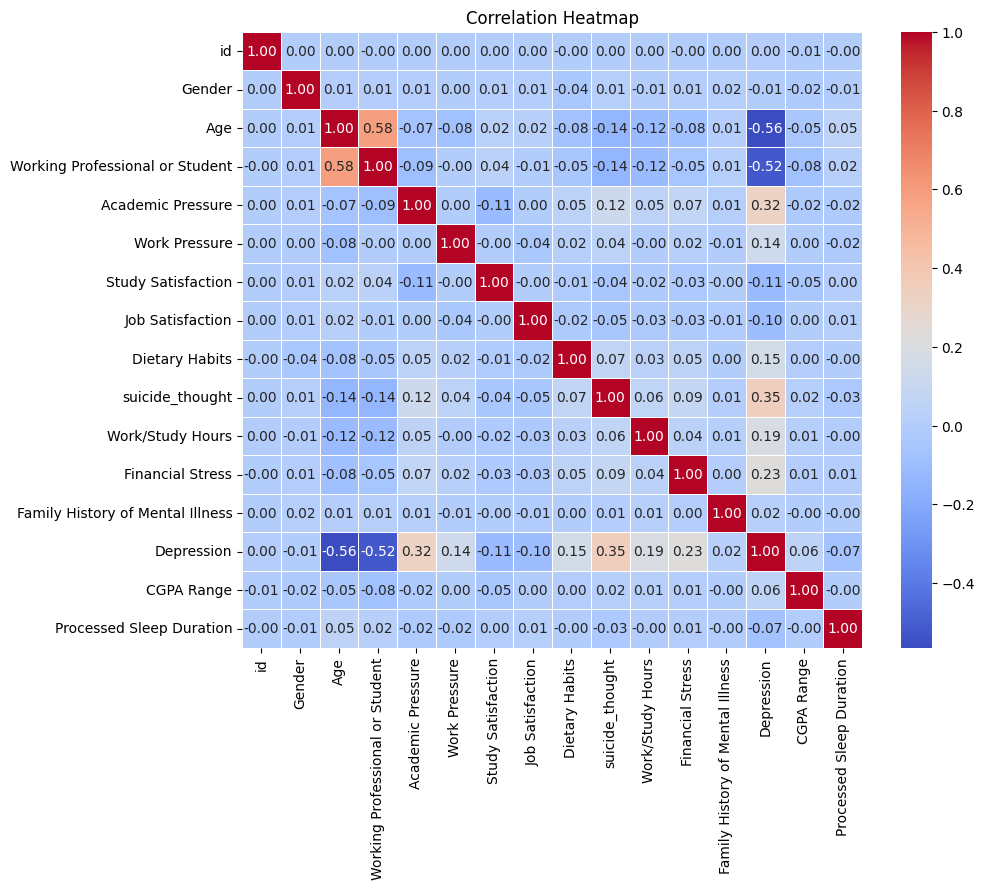

In [51]:
del data1['Name']
# Compute the correlation matrix (this works for numerical data)
corr = data1.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


Number of missing values in 'Age': 0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


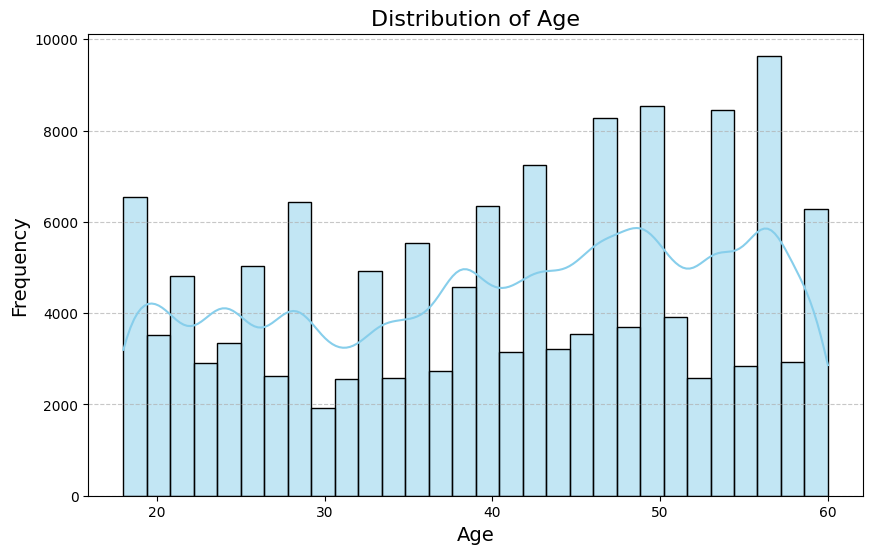

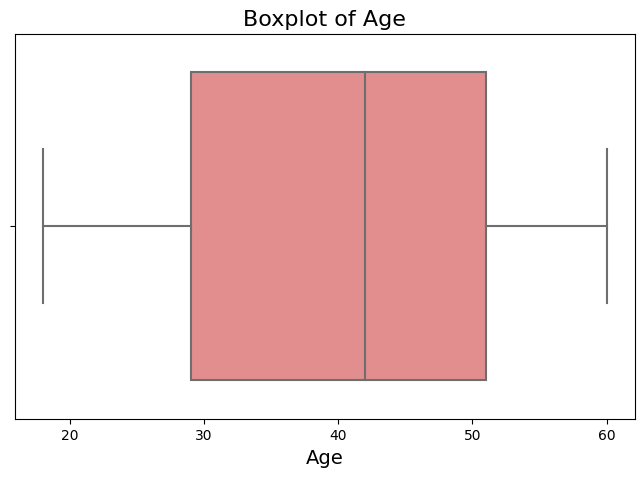

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for null values in the column
print(f"Number of missing values in 'Age': {data1['Age'].isnull().sum()}")

# Drop null values if necessary
age_data = data1['Age'].dropna()

# Plot the histogram and KDE for 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(age_data, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Optional: Boxplot for 'Age'
plt.figure(figsize=(8, 5))
sns.boxplot(x=age_data, color='lightcoral')
plt.title('Boxplot of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.show()


Number of missing values in 'AgCGPA': 58


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


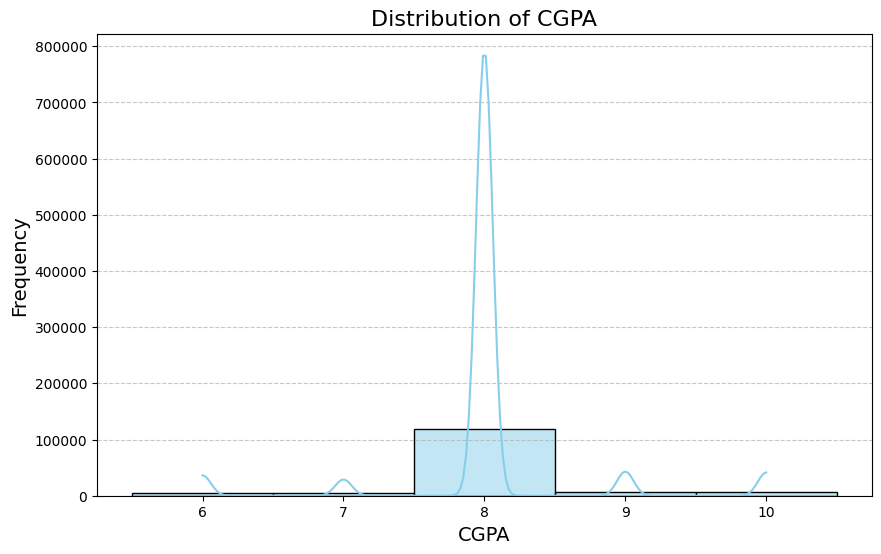

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for null values in the column
print(f"Number of missing values in 'AgCGPA': {data1['CGPA Range'].isnull().sum()}")

# Drop null values if necessary
age_data = data1['CGPA Range'].dropna()

# Plot the histogram and KDE for 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(age_data, kde=True, bins=30, color='skyblue')
plt.title('Distribution of CGPA', fontsize=16)
plt.xlabel('CGPA', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


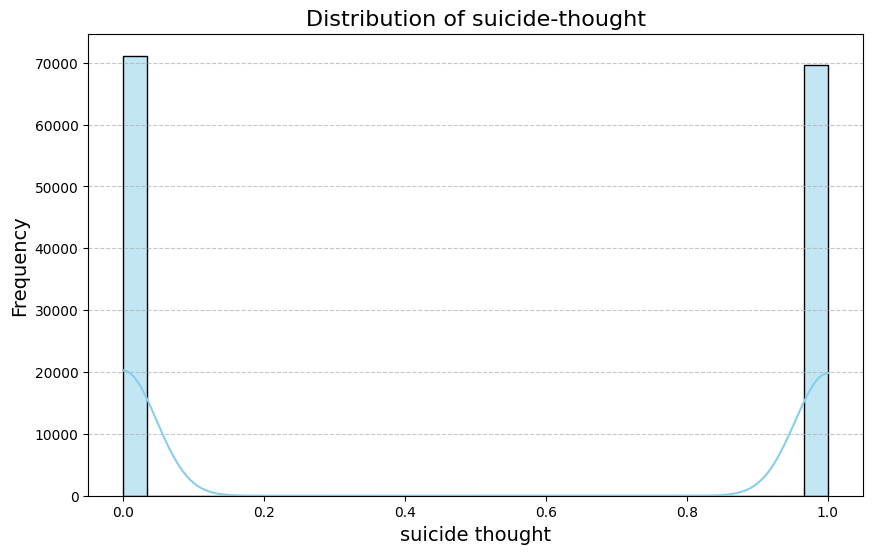

In [54]:
# Drop null values if necessary
age_data = data1['suicide_thought'].dropna()

# Plot the histogram and KDE for 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(age_data, kde=True, bins=30, color='skyblue')
plt.title('Distribution of suicide-thought', fontsize=16)
plt.xlabel('suicide thought', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


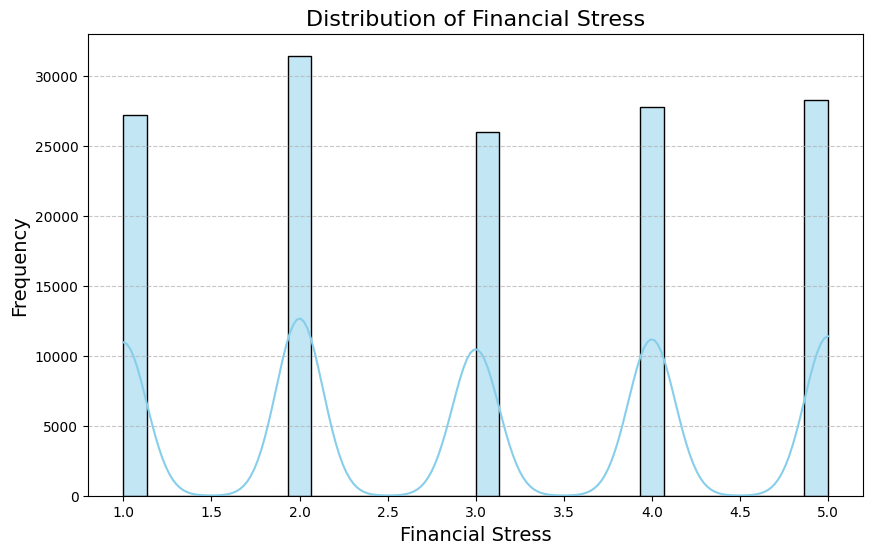

In [55]:
# Drop null values if necessary
age_data = data1['Financial Stress'].dropna()

# Plot the histogram and KDE for 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(age_data, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Financial Stress', fontsize=16)
plt.xlabel('Financial Stress', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


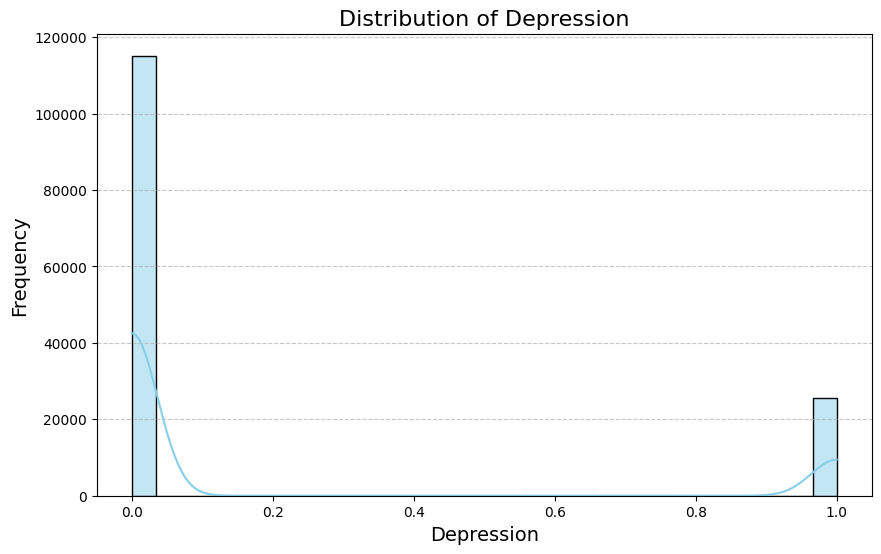

In [56]:
# Drop null values if necessary
age_data = data1['Depression'].dropna()

# Plot the histogram and KDE for 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(age_data, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Depression', fontsize=16)
plt.xlabel('Depression', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


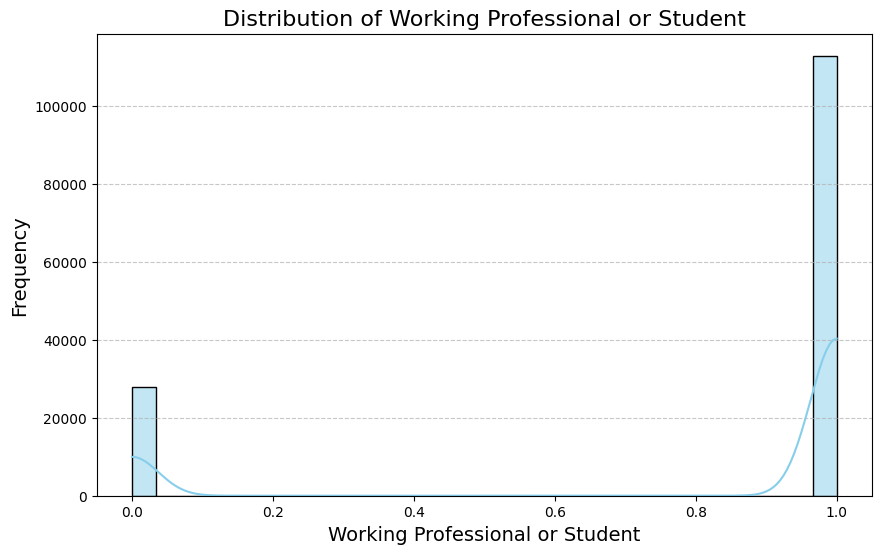

In [57]:
# Drop null values if necessary
age_data = data1['Working Professional or Student'].dropna()

# Plot the histogram and KDE for 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(age_data, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Working Professional or Student', fontsize=16)
plt.xlabel('Working Professional or Student', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


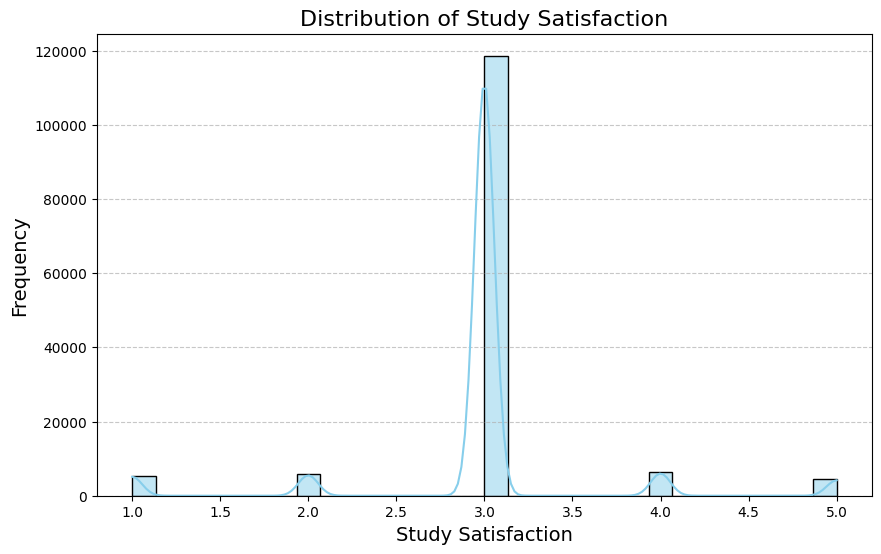

In [58]:
# Drop null values if necessary
age_data = data1['Study Satisfaction'].dropna()

# Plot the histogram and KDE for 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(age_data, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Study Satisfaction', fontsize=16)
plt.xlabel('Study Satisfaction', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


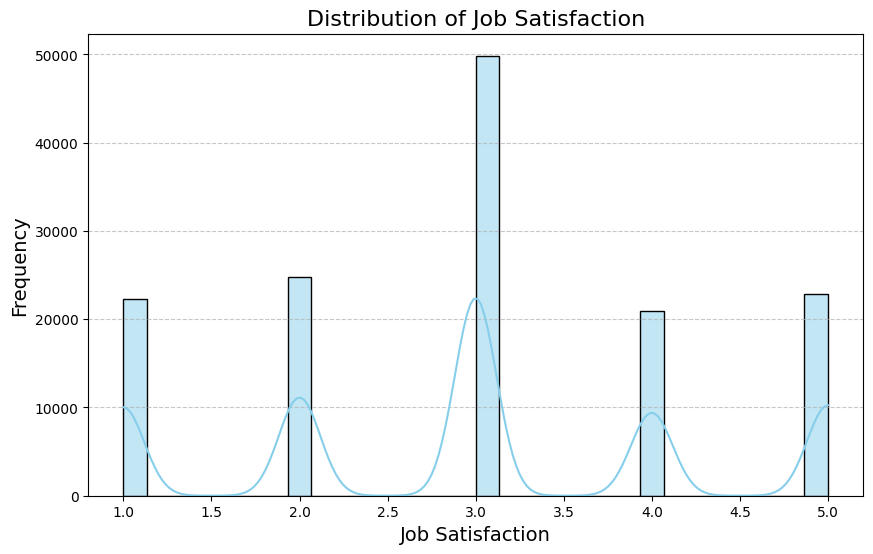

In [59]:
# Drop null values if necessary
age_data = data1['Job Satisfaction'].dropna()

# Plot the histogram and KDE for 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(age_data, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Job Satisfaction', fontsize=16)
plt.xlabel('Job Satisfaction', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [60]:
# Replace NaN values with mode
mode_value = data1['CGPA Range'].mode() 
# Get the mode of the column
data1['CGPA Range'].fillna(mode_value, inplace=True)  

In [61]:
mode_value

0    8
Name: CGPA Range, dtype: category
Categories (9, int64): [2 < 3 < 4 < 5 ... 7 < 8 < 9 < 10]

## RANDOM FOREST

In [62]:
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Step 1: Prepare X and Y
X = data1.drop(columns=['Depression'], axis=1)  # Drop 'Depression' column from inputs
Y = data1['Depression']  # Target variable

# Handle categorical columns (if any) - Use one-hot encoding or label encoding
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables

# Handle missing values (if any)
X = X.fillna(X.mean())

# Step 2: Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Step 3: Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, Y_train)

# Step 4: Make predictions
Y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9360578062070599

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     34434
           1       0.84      0.80      0.82      7776

    accuracy                           0.94     42210
   macro avg       0.90      0.88      0.89     42210
weighted avg       0.94      0.94      0.94     42210


Confusion Matrix:
 [[33285  1149]
 [ 1550  6226]]


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Prepare X and Y
X = data1.drop(columns=['Depression'], axis=1)  # Drop 'Depression' column from inputs
Y = data1['Depression']  # Target variable

# Handle categorical columns (if any) - Use one-hot encoding or label encoding
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables

# Handle missing values (if any)
X = X.fillna(X.mean())

# Step 2: Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Step 3: Train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, Y_train)

# Step 4: Make predictions
Y_pred = logistic_model.predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9255626628760957

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     34434
           1       0.82      0.76      0.79      7776

    accuracy                           0.93     42210
   macro avg       0.88      0.86      0.87     42210
weighted avg       0.92      0.93      0.92     42210


Confusion Matrix:
 [[33121  1313]
 [ 1829  5947]]


## Pre-processing the test data 

In [64]:
test_data = data2

In [65]:
test_data['CGPA']

0         NaN
1         NaN
2         NaN
3        6.84
4         NaN
         ... 
93795     NaN
93796     NaN
93797    7.51
93798     NaN
93799     NaN
Name: CGPA, Length: 93800, dtype: float64

In [66]:
test_data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
93796,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
93797,234497,Rishi,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No
93798,234498,Eshita,Female,23.0,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes


In [67]:
# Get the current column names
columns = list(test_data.columns)

# Rename the column at index 1 (second column)
columns[15] = "suicide_thought"  # Update the column name
test_data.columns = columns  # Reassign the modified column names


In [68]:
test_data["Gender"] = test_data["Gender"].map({"Male": 0, "Female": 1})

In [69]:
test_data["Working Professional or Student"] = test_data["Working Professional or Student"].map({
    "Student": 0,
    "Working Professional": 1
})


In [70]:
test_data.drop(columns=['Name'])
#test_data.drop(columns=['Profession'])

,id,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,0,53.0,Visakhapatnam,1,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,1,58.0,Kolkata,1,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,0,53.0,Jaipur,1,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,1,23.0,Rajkot,0,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,0,47.0,Kalyan,1,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,1,49.0,Jaipur,1,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
93796,234496,0,29.0,Ahmedabad,1,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
93797,234497,0,24.0,Visakhapatnam,0,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No
93798,234498,1,23.0,Kalyan,1,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes


In [71]:
# Calculate mode of the column
mode_value = test_data["Academic Pressure"].mode()[0]

# Replace NaN with the mode
test_data["Academic Pressure"].fillna(mode_value, inplace=True)

print(test_data)

           id     Name  Gender   Age           City  \
0      140700   Shivam       0  53.0  Visakhapatnam   
1      140701    Sanya       1  58.0        Kolkata   
2      140702     Yash       0  53.0         Jaipur   
3      140703   Nalini       1  23.0         Rajkot   
4      140704  Shaurya       0  47.0         Kalyan   
...       ...      ...     ...   ...            ...   
93795  234495     Zoya       1  49.0         Jaipur   
93796  234496    Shlok       0  29.0      Ahmedabad   
93797  234497    Rishi       0  24.0  Visakhapatnam   
93798  234498   Eshita       1  23.0         Kalyan   
93799  234499    Gauri       1  43.0       Varanasi   

       Working Professional or Student              Profession  \
0                                    1                   Judge   
1                                    1  Educational Consultant   
2                                    1                 Teacher   
3                                    0                     NaN   
4        

In [72]:
test_data['CGPA'].unique()

array([  nan,  6.84,  7.39,  6.03,  8.63,  8.61,  6.73,  5.58,  7.94,
        9.04,  9.6 ,  8.91,  9.54,  8.13,  6.16,  7.38,  7.04,  9.41,
        5.59,  9.89,  8.7 ,  5.56,  6.42,  8.07,  9.86,  9.71,  8.93,
        5.12,  7.48,  9.74,  5.66,  6.38,  8.59,  7.88,  9.88,  8.9 ,
        8.74,  7.47,  8.94,  8.65,  5.88,  6.1 ,  8.14,  8.04,  5.75,
        9.56,  7.35,  8.78,  6.26,  7.09,  8.24,  8.21,  9.44,  6.37,
        5.74,  7.52,  5.87,  7.85,  5.03,  7.5 ,  9.29,  8.89,  9.93,
        8.52,  7.92,  8.19,  8.29,  6.81,  5.08,  5.85,  7.17,  7.51,
        8.95,  5.52,  7.7 ,  9.96,  7.15,  5.16,  9.24,  9.02,  6.21,
        6.43,  8.88,  7.53,  9.21,  7.22,  8.09,  9.97,  8.08,  5.09,
        8.79,  8.38,  7.64,  5.48,  8.96,  8.17,  7.83,  5.27,  9.1 ,
        8.11,  7.8 ,  7.9 ,  5.99,  7.03,  6.89,  7.25,  9.95,  9.63,
        8.92,  5.81,  5.82,  5.64,  5.6 ,  9.33,  8.44,  9.37,  6.78,
        6.27,  8.5 ,  6.47,  9.34,  8.03,  7.1 ,  6.99,  5.37,  5.41,
        5.38,  5.91,

In [73]:
# Calculate the mode of the 'CGPA Range' column, excluding NaN values
mean_cgpa = test_data['CGPA'].mean()

# Fill NaN values in 'CGPA Range' with the calculated mode
test_data['CGPA'].fillna(mean_cgpa, inplace=True)

print(data1)

# Define bins and labels
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = ["1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8", "8-9", "9-10"]

# Create a new column with binned ranges
test_data["CGPA Range"] = pd.cut(test_data["CGPA"], bins=bins, labels=labels, right=False)

print(test_data)

            id  Gender   Age  Working Professional or Student  \
0            0       1  49.0                                1   
1            1       0  26.0                                1   
2            2       0  33.0                                0   
3            3       0  22.0                                1   
4            4       1  30.0                                1   
...        ...     ...   ...                              ...   
140695  140695       1  18.0                                1   
140696  140696       1  41.0                                1   
140697  140697       1  24.0                                1   
140698  140698       1  49.0                                1   
140699  140699       0  27.0                                0   

        Academic Pressure  Work Pressure  Study Satisfaction  \
0                     3.0            5.0                 3.0   
1                     3.0            4.0                 3.0   
2                     5.0  

In [74]:
# Function to extract the upper value from a range
def extract_upper_value(value):
    if isinstance(value, str):
        range_values = value.split('-')
        if len(range_values) == 2:
            try:
                return int(range_values[1])  # Return the upper value of the range
            except ValueError:
                return np.nan  # Return NaN if conversion fails
    return np.nan  # Return NaN if value is not a valid range

# Apply the function to both columns
test_data['CGPA Range'] = test_data['CGPA Range'].apply(extract_upper_value)

In [75]:
test_data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,CGPA Range
0,140700,Shivam,0,53.0,Visakhapatnam,1,Judge,3.0,2.0,7.674016,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes,8
1,140701,Sanya,1,58.0,Kolkata,1,Educational Consultant,3.0,2.0,7.674016,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No,8
2,140702,Yash,0,53.0,Jaipur,1,Teacher,3.0,4.0,7.674016,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No,8
3,140703,Nalini,1,23.0,Rajkot,0,NaN,5.0,NaN,6.840000,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No,7
4,140704,Shaurya,0,47.0,Kalyan,1,Teacher,3.0,5.0,7.674016,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,1,49.0,Jaipur,1,Pilot,3.0,3.0,7.674016,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes,8
93796,234496,Shlok,0,29.0,Ahmedabad,1,Pilot,3.0,5.0,7.674016,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes,8
93797,234497,Rishi,0,24.0,Visakhapatnam,0,NaN,1.0,NaN,7.510000,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No,8
93798,234498,Eshita,1,23.0,Kalyan,1,Marketing Manager,3.0,4.0,7.674016,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes,8


In [76]:
test_data.drop(columns = ['CGPA'])


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,CGPA Range
0,140700,Shivam,0,53.0,Visakhapatnam,1,Judge,3.0,2.0,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes,8
1,140701,Sanya,1,58.0,Kolkata,1,Educational Consultant,3.0,2.0,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No,8
2,140702,Yash,0,53.0,Jaipur,1,Teacher,3.0,4.0,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No,8
3,140703,Nalini,1,23.0,Rajkot,0,NaN,5.0,NaN,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No,7
4,140704,Shaurya,0,47.0,Kalyan,1,Teacher,3.0,5.0,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,1,49.0,Jaipur,1,Pilot,3.0,3.0,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes,8
93796,234496,Shlok,0,29.0,Ahmedabad,1,Pilot,3.0,5.0,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes,8
93797,234497,Rishi,0,24.0,Visakhapatnam,0,NaN,1.0,NaN,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No,8
93798,234498,Eshita,1,23.0,Kalyan,1,Marketing Manager,3.0,4.0,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes,8


In [77]:
test_data['Dietary Habits'].unique()

array(['Moderate', 'Healthy', 'Unhealthy', 'More Healthy', 'No', 'Indoor',
       'Prachi', nan, 'Male', 'Less Healthy', 'Mealy', 'Resistant', 'MCA',
       '5 Healthy', 'Academic', 'Educational', 'Soham', '5 Unhealthy',
       'Vivaan', 'Raghav', '1.0', 'Naina', 'Kolkata'], dtype=object)

In [78]:
# Calculate mode of the column
median_value4 = test_data["Study Satisfaction"].median()

# Replace NaN with the mode
test_data["Study Satisfaction"].fillna(median_value4, inplace=True)

print(test_data)

           id     Name  Gender   Age           City  \
0      140700   Shivam       0  53.0  Visakhapatnam   
1      140701    Sanya       1  58.0        Kolkata   
2      140702     Yash       0  53.0         Jaipur   
3      140703   Nalini       1  23.0         Rajkot   
4      140704  Shaurya       0  47.0         Kalyan   
...       ...      ...     ...   ...            ...   
93795  234495     Zoya       1  49.0         Jaipur   
93796  234496    Shlok       0  29.0      Ahmedabad   
93797  234497    Rishi       0  24.0  Visakhapatnam   
93798  234498   Eshita       1  23.0         Kalyan   
93799  234499    Gauri       1  43.0       Varanasi   

       Working Professional or Student              Profession  \
0                                    1                   Judge   
1                                    1  Educational Consultant   
2                                    1                 Teacher   
3                                    0                     NaN   
4        

In [79]:
# Calculate mode of the column
median_value5 = test_data["Job Satisfaction"].median()

# Replace NaN with the mode
test_data["Job Satisfaction"].fillna(median_value5, inplace=True)

print(test_data)

           id     Name  Gender   Age           City  \
0      140700   Shivam       0  53.0  Visakhapatnam   
1      140701    Sanya       1  58.0        Kolkata   
2      140702     Yash       0  53.0         Jaipur   
3      140703   Nalini       1  23.0         Rajkot   
4      140704  Shaurya       0  47.0         Kalyan   
...       ...      ...     ...   ...            ...   
93795  234495     Zoya       1  49.0         Jaipur   
93796  234496    Shlok       0  29.0      Ahmedabad   
93797  234497    Rishi       0  24.0  Visakhapatnam   
93798  234498   Eshita       1  23.0         Kalyan   
93799  234499    Gauri       1  43.0       Varanasi   

       Working Professional or Student              Profession  \
0                                    1                   Judge   
1                                    1  Educational Consultant   
2                                    1                 Teacher   
3                                    0                     NaN   
4        

In [80]:
test_data["Sleep Duration"] = test_data["Sleep Duration"].apply(
    lambda x: x if isinstance(x, str) and 'hours' in x and any(char.isdigit() for char in x) else np.nan
)

In [81]:
# Replace NaN values with mode
mode_value6 = test_data['Sleep Duration'].mode()[0]  # Get the mode of the column
test_data['Sleep Duration'].fillna(mode_value, inplace=True)  

In [82]:
import re
def extract_numbers(value):
    numbers = re.findall(r'\d+', str(value))  # Extract all numbers
    return ", ".join(numbers)  # Join multiple numbers with commas

# Apply function to the column
test_data['Extracted Numbers'] = test_data['Sleep Duration'].apply(extract_numbers)

# Display the result
print(test_data)

           id     Name  Gender   Age           City  \
0      140700   Shivam       0  53.0  Visakhapatnam   
1      140701    Sanya       1  58.0        Kolkata   
2      140702     Yash       0  53.0         Jaipur   
3      140703   Nalini       1  23.0         Rajkot   
4      140704  Shaurya       0  47.0         Kalyan   
...       ...      ...     ...   ...            ...   
93795  234495     Zoya       1  49.0         Jaipur   
93796  234496    Shlok       0  29.0      Ahmedabad   
93797  234497    Rishi       0  24.0  Visakhapatnam   
93798  234498   Eshita       1  23.0         Kalyan   
93799  234499    Gauri       1  43.0       Varanasi   

       Working Professional or Student              Profession  \
0                                    1                   Judge   
1                                    1  Educational Consultant   
2                                    1                 Teacher   
3                                    0                     NaN   
4        

In [83]:
# Define the mode value for replacement
mode_numeric = test_data['Extracted Numbers'].mode()[0]  # Get the mode of the extracted numbers

# Replace specific patterns with the mode value
values_to_replace = ['40, 45', '55, 66', '35, 36', '49', '45, 48']
test_data['Extracted Numbers'] =test_data['Extracted Numbers'].replace(values_to_replace, mode_numeric)

# Display the result
test_data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,CGPA Range,Extracted Numbers
0,140700,Shivam,0,53.0,Visakhapatnam,1,Judge,3.0,2.0,7.674016,...,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes,8,5
1,140701,Sanya,1,58.0,Kolkata,1,Educational Consultant,3.0,2.0,7.674016,...,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No,8,5
2,140702,Yash,0,53.0,Jaipur,1,Teacher,3.0,4.0,7.674016,...,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No,8,"7, 8"
3,140703,Nalini,1,23.0,Rajkot,0,NaN,5.0,NaN,6.840000,...,3.0,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No,7,8
4,140704,Shaurya,0,47.0,Kalyan,1,Teacher,3.0,5.0,7.674016,...,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No,8,"7, 8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,1,49.0,Jaipur,1,Pilot,3.0,3.0,7.674016,...,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes,8,5
93796,234496,Shlok,0,29.0,Ahmedabad,1,Pilot,3.0,5.0,7.674016,...,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes,8,"7, 8"
93797,234497,Rishi,0,24.0,Visakhapatnam,0,NaN,1.0,NaN,7.510000,...,3.0,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No,8,"7, 8"
93798,234498,Eshita,1,23.0,Kalyan,1,Marketing Manager,3.0,4.0,7.674016,...,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes,8,"5, 6"


In [84]:
# Function to process 'Extracted Numbers' into ranges
def process_extracted_numbers(value):
    numbers = re.findall(r'\d+', str(value))  # Extract all numbers
    if len(numbers) == 1:
        num = int(numbers[0])
        return f"{num-1}-{num}" if num > 0 else f"0-{num}"  # Single number range
    elif len(numbers) > 1:
        return f"{numbers[0]}-{numbers[-1]}"  # Multiple numbers form a range
    else:
        return np.nan  # Handle cases with no numbers

# Apply the function to process the column
test_data['Processed Numbers'] = test_data['Extracted Numbers'].apply(process_extracted_numbers)

# Display the final DataFrame
print(test_data)


           id     Name  Gender   Age           City  \
0      140700   Shivam       0  53.0  Visakhapatnam   
1      140701    Sanya       1  58.0        Kolkata   
2      140702     Yash       0  53.0         Jaipur   
3      140703   Nalini       1  23.0         Rajkot   
4      140704  Shaurya       0  47.0         Kalyan   
...       ...      ...     ...   ...            ...   
93795  234495     Zoya       1  49.0         Jaipur   
93796  234496    Shlok       0  29.0      Ahmedabad   
93797  234497    Rishi       0  24.0  Visakhapatnam   
93798  234498   Eshita       1  23.0         Kalyan   
93799  234499    Gauri       1  43.0       Varanasi   

       Working Professional or Student              Profession  \
0                                    1                   Judge   
1                                    1  Educational Consultant   
2                                    1                 Teacher   
3                                    0                     NaN   
4        

In [85]:
test_data.rename(columns={'Processed Numbers': 'Processed Sleep Duration'}, inplace=True)


In [86]:
test_data.drop(columns = ['Extracted Numbers'])


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,CGPA Range,Processed Sleep Duration
0,140700,Shivam,0,53.0,Visakhapatnam,1,Judge,3.0,2.0,7.674016,...,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes,8,4-5
1,140701,Sanya,1,58.0,Kolkata,1,Educational Consultant,3.0,2.0,7.674016,...,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No,8,4-5
2,140702,Yash,0,53.0,Jaipur,1,Teacher,3.0,4.0,7.674016,...,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No,8,7-8
3,140703,Nalini,1,23.0,Rajkot,0,NaN,5.0,NaN,6.840000,...,3.0,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No,7,7-8
4,140704,Shaurya,0,47.0,Kalyan,1,Teacher,3.0,5.0,7.674016,...,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No,8,7-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,1,49.0,Jaipur,1,Pilot,3.0,3.0,7.674016,...,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes,8,4-5
93796,234496,Shlok,0,29.0,Ahmedabad,1,Pilot,3.0,5.0,7.674016,...,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes,8,7-8
93797,234497,Rishi,0,24.0,Visakhapatnam,0,NaN,1.0,NaN,7.510000,...,3.0,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No,8,7-8
93798,234498,Eshita,1,23.0,Kalyan,1,Marketing Manager,3.0,4.0,7.674016,...,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes,8,5-6


In [87]:

test_data.drop(columns = ['Sleep Duration'])

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Job Satisfaction,Dietary Habits,Degree,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,CGPA Range,Extracted Numbers,Processed Sleep Duration
0,140700,Shivam,0,53.0,Visakhapatnam,1,Judge,3.0,2.0,7.674016,...,5.0,Moderate,LLB,No,9.0,3.0,Yes,8,5,4-5
1,140701,Sanya,1,58.0,Kolkata,1,Educational Consultant,3.0,2.0,7.674016,...,4.0,Moderate,B.Ed,No,6.0,4.0,No,8,5,4-5
2,140702,Yash,0,53.0,Jaipur,1,Teacher,3.0,4.0,7.674016,...,1.0,Moderate,B.Arch,Yes,12.0,4.0,No,8,"7, 8",7-8
3,140703,Nalini,1,23.0,Rajkot,0,NaN,5.0,NaN,6.840000,...,3.0,Moderate,BSc,Yes,10.0,4.0,No,7,8,7-8
4,140704,Shaurya,0,47.0,Kalyan,1,Teacher,3.0,5.0,7.674016,...,5.0,Moderate,BCA,Yes,3.0,4.0,No,8,"7, 8",7-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,1,49.0,Jaipur,1,Pilot,3.0,3.0,7.674016,...,5.0,Moderate,BSc,Yes,2.0,2.0,Yes,8,5,4-5
93796,234496,Shlok,0,29.0,Ahmedabad,1,Pilot,3.0,5.0,7.674016,...,1.0,Moderate,BE,Yes,11.0,3.0,Yes,8,"7, 8",7-8
93797,234497,Rishi,0,24.0,Visakhapatnam,0,NaN,1.0,NaN,7.510000,...,3.0,Moderate,B.Tech,No,7.0,1.0,No,8,"7, 8",7-8
93798,234498,Eshita,1,23.0,Kalyan,1,Marketing Manager,3.0,4.0,7.674016,...,2.0,Healthy,BA,Yes,7.0,5.0,Yes,8,"5, 6",5-6


In [88]:
test_data.drop(columns= ['Degree'])

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Job Satisfaction,Sleep Duration,Dietary Habits,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,CGPA Range,Extracted Numbers,Processed Sleep Duration
0,140700,Shivam,0,53.0,Visakhapatnam,1,Judge,3.0,2.0,7.674016,...,5.0,Less than 5 hours,Moderate,No,9.0,3.0,Yes,8,5,4-5
1,140701,Sanya,1,58.0,Kolkata,1,Educational Consultant,3.0,2.0,7.674016,...,4.0,Less than 5 hours,Moderate,No,6.0,4.0,No,8,5,4-5
2,140702,Yash,0,53.0,Jaipur,1,Teacher,3.0,4.0,7.674016,...,1.0,7-8 hours,Moderate,Yes,12.0,4.0,No,8,"7, 8",7-8
3,140703,Nalini,1,23.0,Rajkot,0,NaN,5.0,NaN,6.840000,...,3.0,More than 8 hours,Moderate,Yes,10.0,4.0,No,7,8,7-8
4,140704,Shaurya,0,47.0,Kalyan,1,Teacher,3.0,5.0,7.674016,...,5.0,7-8 hours,Moderate,Yes,3.0,4.0,No,8,"7, 8",7-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,1,49.0,Jaipur,1,Pilot,3.0,3.0,7.674016,...,5.0,Less than 5 hours,Moderate,Yes,2.0,2.0,Yes,8,5,4-5
93796,234496,Shlok,0,29.0,Ahmedabad,1,Pilot,3.0,5.0,7.674016,...,1.0,7-8 hours,Moderate,Yes,11.0,3.0,Yes,8,"7, 8",7-8
93797,234497,Rishi,0,24.0,Visakhapatnam,0,NaN,1.0,NaN,7.510000,...,3.0,7-8 hours,Moderate,No,7.0,1.0,No,8,"7, 8",7-8
93798,234498,Eshita,1,23.0,Kalyan,1,Marketing Manager,3.0,4.0,7.674016,...,2.0,5-6 hours,Healthy,Yes,7.0,5.0,Yes,8,"5, 6",5-6


In [89]:
# Replace NaN values with mode
median7_value = test_data['Financial Stress'].median() # Get the mode of the column
test_data['Financial Stress'].fillna(median2_value, inplace=True)  

In [90]:
test_data.drop(columns=['Degree'])

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Job Satisfaction,Sleep Duration,Dietary Habits,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,CGPA Range,Extracted Numbers,Processed Sleep Duration
0,140700,Shivam,0,53.0,Visakhapatnam,1,Judge,3.0,2.0,7.674016,...,5.0,Less than 5 hours,Moderate,No,9.0,3.0,Yes,8,5,4-5
1,140701,Sanya,1,58.0,Kolkata,1,Educational Consultant,3.0,2.0,7.674016,...,4.0,Less than 5 hours,Moderate,No,6.0,4.0,No,8,5,4-5
2,140702,Yash,0,53.0,Jaipur,1,Teacher,3.0,4.0,7.674016,...,1.0,7-8 hours,Moderate,Yes,12.0,4.0,No,8,"7, 8",7-8
3,140703,Nalini,1,23.0,Rajkot,0,NaN,5.0,NaN,6.840000,...,3.0,More than 8 hours,Moderate,Yes,10.0,4.0,No,7,8,7-8
4,140704,Shaurya,0,47.0,Kalyan,1,Teacher,3.0,5.0,7.674016,...,5.0,7-8 hours,Moderate,Yes,3.0,4.0,No,8,"7, 8",7-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,1,49.0,Jaipur,1,Pilot,3.0,3.0,7.674016,...,5.0,Less than 5 hours,Moderate,Yes,2.0,2.0,Yes,8,5,4-5
93796,234496,Shlok,0,29.0,Ahmedabad,1,Pilot,3.0,5.0,7.674016,...,1.0,7-8 hours,Moderate,Yes,11.0,3.0,Yes,8,"7, 8",7-8
93797,234497,Rishi,0,24.0,Visakhapatnam,0,NaN,1.0,NaN,7.510000,...,3.0,7-8 hours,Moderate,No,7.0,1.0,No,8,"7, 8",7-8
93798,234498,Eshita,1,23.0,Kalyan,1,Marketing Manager,3.0,4.0,7.674016,...,2.0,5-6 hours,Healthy,Yes,7.0,5.0,Yes,8,"5, 6",5-6


In [91]:
test_data.drop(columns=['Profession'])

,id,Name,Gender,Age,City,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,...,Sleep Duration,Dietary Habits,Degree,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,CGPA Range,Extracted Numbers,Processed Sleep Duration
0,140700,Shivam,0,53.0,Visakhapatnam,1,3.0,2.0,7.674016,3.0,...,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes,8,5,4-5
1,140701,Sanya,1,58.0,Kolkata,1,3.0,2.0,7.674016,3.0,...,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No,8,5,4-5
2,140702,Yash,0,53.0,Jaipur,1,3.0,4.0,7.674016,3.0,...,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No,8,"7, 8",7-8
3,140703,Nalini,1,23.0,Rajkot,0,5.0,NaN,6.840000,1.0,...,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No,7,8,7-8
4,140704,Shaurya,0,47.0,Kalyan,1,3.0,5.0,7.674016,3.0,...,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No,8,"7, 8",7-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,1,49.0,Jaipur,1,3.0,3.0,7.674016,3.0,...,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes,8,5,4-5
93796,234496,Shlok,0,29.0,Ahmedabad,1,3.0,5.0,7.674016,3.0,...,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes,8,"7, 8",7-8
93797,234497,Rishi,0,24.0,Visakhapatnam,0,1.0,NaN,7.510000,4.0,...,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No,8,"7, 8",7-8
93798,234498,Eshita,1,23.0,Kalyan,1,3.0,4.0,7.674016,3.0,...,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes,8,"5, 6",5-6


In [92]:
test_data.drop(columns=['City','Profession'])

,id,Name,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,CGPA Range,Extracted Numbers,Processed Sleep Duration
0,140700,Shivam,0,53.0,1,3.0,2.0,7.674016,3.0,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes,8,5,4-5
1,140701,Sanya,1,58.0,1,3.0,2.0,7.674016,3.0,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No,8,5,4-5
2,140702,Yash,0,53.0,1,3.0,4.0,7.674016,3.0,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No,8,"7, 8",7-8
3,140703,Nalini,1,23.0,0,5.0,NaN,6.840000,1.0,3.0,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No,7,8,7-8
4,140704,Shaurya,0,47.0,1,3.0,5.0,7.674016,3.0,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No,8,"7, 8",7-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,1,49.0,1,3.0,3.0,7.674016,3.0,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes,8,5,4-5
93796,234496,Shlok,0,29.0,1,3.0,5.0,7.674016,3.0,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes,8,"7, 8",7-8
93797,234497,Rishi,0,24.0,0,1.0,NaN,7.510000,4.0,3.0,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No,8,"7, 8",7-8
93798,234498,Eshita,1,23.0,1,3.0,4.0,7.674016,3.0,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes,8,"5, 6",5-6


In [93]:
# Replace 'Yes' with 'Healthy' and 'No' with 'Unhealthy'
test_data['Dietary Habits'] = test_data['Dietary Habits'].replace({'Yes': 'Healthy', 'No': 'Unhealthy'})

# Filter the valid values
valid_values = ['More Healthy', 'Healthy', 'Unhealthy', 'Less Healthy','Moderate']

# Replace other values by the mode of these valid values
mode_value8 = test_data['Dietary Habits'].mode()[0]  # Get the mode of the valid values
test_data['Dietary Habits'] = test_data['Dietary Habits'].apply(lambda x: x if x in valid_values else mode_value)

# Display the updated DataFrame
(test_data)


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Sleep Duration,Dietary Habits,Degree,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,CGPA Range,Extracted Numbers,Processed Sleep Duration
0,140700,Shivam,0,53.0,Visakhapatnam,1,Judge,3.0,2.0,7.674016,...,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes,8,5,4-5
1,140701,Sanya,1,58.0,Kolkata,1,Educational Consultant,3.0,2.0,7.674016,...,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No,8,5,4-5
2,140702,Yash,0,53.0,Jaipur,1,Teacher,3.0,4.0,7.674016,...,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No,8,"7, 8",7-8
3,140703,Nalini,1,23.0,Rajkot,0,NaN,5.0,NaN,6.840000,...,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No,7,8,7-8
4,140704,Shaurya,0,47.0,Kalyan,1,Teacher,3.0,5.0,7.674016,...,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No,8,"7, 8",7-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,1,49.0,Jaipur,1,Pilot,3.0,3.0,7.674016,...,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes,8,5,4-5
93796,234496,Shlok,0,29.0,Ahmedabad,1,Pilot,3.0,5.0,7.674016,...,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes,8,"7, 8",7-8
93797,234497,Rishi,0,24.0,Visakhapatnam,0,NaN,1.0,NaN,7.510000,...,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No,8,"7, 8",7-8
93798,234498,Eshita,1,23.0,Kalyan,1,Marketing Manager,3.0,4.0,7.674016,...,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes,8,"5, 6",5-6


In [94]:
data1['Dietary Habits'] =  data1['Dietary Habits'].map({'More Healthy':1,'Healthy':2,'Moderate':3,'Less healthy':4,'Unhealthy':5})

In [95]:
test_data['Dietary Habits'].unique()

array(['Moderate', 'Healthy', 'Unhealthy', 'More Healthy', 3.0,
       'Less Healthy'], dtype=object)

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt


del test_data['City']



In [97]:
del test_data['Profession']

In [98]:
del test_data['Sleep Duration']

In [99]:
del test_data['Degree']


In [100]:
# Replace 'Yes' with 'Healthy' and 'No' with 'Unhealthy'
test_data['Dietary Habits'] = test_data['Dietary Habits'].replace({'Yes': 'Healthy', 'No': 'Unhealthy'})

# Filter the valid values
valid_values = ['More Healthy', 'Healthy', 'Unhealthy', 'Less Healthy']

# Replace other values by the mode of these valid values
mode_value8 = test_data['Dietary Habits'].mode()[0]  # Get the mode of the valid values
test_data['Dietary Habits'] = test_data['Dietary Habits'].apply(lambda x: x if x in valid_values else mode_value)

# Display the updated DataFrame
(test_data)


,id,Name,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,CGPA Range,Extracted Numbers,Processed Sleep Duration
0,140700,Shivam,0,53.0,1,3.0,2.0,7.674016,3.0,5.0,3.0,No,9.0,3.0,Yes,8,5,4-5
1,140701,Sanya,1,58.0,1,3.0,2.0,7.674016,3.0,4.0,3.0,No,6.0,4.0,No,8,5,4-5
2,140702,Yash,0,53.0,1,3.0,4.0,7.674016,3.0,1.0,3.0,Yes,12.0,4.0,No,8,"7, 8",7-8
3,140703,Nalini,1,23.0,0,5.0,NaN,6.840000,1.0,3.0,3.0,Yes,10.0,4.0,No,7,8,7-8
4,140704,Shaurya,0,47.0,1,3.0,5.0,7.674016,3.0,5.0,3.0,Yes,3.0,4.0,No,8,"7, 8",7-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,1,49.0,1,3.0,3.0,7.674016,3.0,5.0,3.0,Yes,2.0,2.0,Yes,8,5,4-5
93796,234496,Shlok,0,29.0,1,3.0,5.0,7.674016,3.0,1.0,3.0,Yes,11.0,3.0,Yes,8,"7, 8",7-8
93797,234497,Rishi,0,24.0,0,1.0,NaN,7.510000,4.0,3.0,3.0,No,7.0,1.0,No,8,"7, 8",7-8
93798,234498,Eshita,1,23.0,1,3.0,4.0,7.674016,3.0,2.0,Healthy,Yes,7.0,5.0,Yes,8,"5, 6",5-6


In [101]:
test_data['Dietary Habits'] =  test_data['Dietary Habits'].map({'More Healthy':1,'Healthy':2,'Moderate':3,'Less healthy':4,'Unhealthy':5})

In [102]:
del test_data['Extracted Numbers']

In [103]:
test_data['Family History of Mental Illness'].unique()

array(['Yes', 'No'], dtype=object)

In [104]:
test_data['Family History of Mental Illness'] = test_data['Family History of Mental Illness'].map({'Yes':1 ,'No':0})

In [105]:
# Replace NaN values with mode
median9_value = test_data['Work Pressure'].median() # Get the mode of the column
test_data['Work Pressure'].fillna(median9_value, inplace=True)  

In [106]:
# Function to extract the upper value from a range
def extract_upper_value(value):
    if isinstance(value, str):
        range_values = value.split('-')
        if len(range_values) == 2:
            try:
                return int(range_values[1])  # Return the upper value of the range
            except ValueError:
                return np.nan  # Return NaN if conversion fails
    return np.nan  # Return NaN if value is not a valid range

# Apply the function to both columns
#test_data['CGPA Range'] = test_data['CGPA Range'].apply(extract_upper_value)
test_data['Processed Sleep Duration'] = test_data['Processed Sleep Duration'].apply(extract_upper_value)

# Display the updated DataFrame
print(test_data)


           id     Name  Gender   Age  Working Professional or Student  \
0      140700   Shivam       0  53.0                                1   
1      140701    Sanya       1  58.0                                1   
2      140702     Yash       0  53.0                                1   
3      140703   Nalini       1  23.0                                0   
4      140704  Shaurya       0  47.0                                1   
...       ...      ...     ...   ...                              ...   
93795  234495     Zoya       1  49.0                                1   
93796  234496    Shlok       0  29.0                                1   
93797  234497    Rishi       0  24.0                                0   
93798  234498   Eshita       1  23.0                                1   
93799  234499    Gauri       1  43.0                                1   

       Academic Pressure  Work Pressure      CGPA  Study Satisfaction  \
0                    3.0            2.0  7.674016 

In [107]:
del test_data['CGPA']

In [108]:
test_data

,id,Name,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Dietary Habits,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,CGPA Range,Processed Sleep Duration
0,140700,Shivam,0,53.0,1,3.0,2.0,3.0,5.0,NaN,No,9.0,3.0,1,8,5
1,140701,Sanya,1,58.0,1,3.0,2.0,3.0,4.0,NaN,No,6.0,4.0,0,8,5
2,140702,Yash,0,53.0,1,3.0,4.0,3.0,1.0,NaN,Yes,12.0,4.0,0,8,8
3,140703,Nalini,1,23.0,0,5.0,3.0,1.0,3.0,NaN,Yes,10.0,4.0,0,7,8
4,140704,Shaurya,0,47.0,1,3.0,5.0,3.0,5.0,NaN,Yes,3.0,4.0,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,1,49.0,1,3.0,3.0,3.0,5.0,NaN,Yes,2.0,2.0,1,8,5
93796,234496,Shlok,0,29.0,1,3.0,5.0,3.0,1.0,NaN,Yes,11.0,3.0,1,8,8
93797,234497,Rishi,0,24.0,0,1.0,3.0,4.0,3.0,NaN,No,7.0,1.0,0,8,8
93798,234498,Eshita,1,23.0,1,3.0,4.0,3.0,2.0,2.0,Yes,7.0,5.0,1,8,6


In [109]:
data1

,id,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Dietary Habits,suicide_thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA Range,Processed Sleep Duration
0,0,1,49.0,1,3.0,5.0,3.0,2.0,NaN,0,1.0,2.0,0,0,8,8
1,1,0,26.0,1,3.0,4.0,3.0,3.0,NaN,1,7.0,3.0,0,1,8,5
2,2,0,33.0,0,5.0,3.0,2.0,3.0,NaN,1,3.0,1.0,0,1,9,6
3,3,0,22.0,1,3.0,5.0,3.0,1.0,NaN,1,10.0,1.0,1,1,8,5
4,4,1,30.0,1,3.0,1.0,3.0,1.0,NaN,1,9.0,4.0,1,0,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,1,18.0,1,3.0,5.0,3.0,4.0,NaN,0,2.0,4.0,1,1,8,6
140696,140696,1,41.0,1,3.0,5.0,3.0,4.0,NaN,1,6.0,5.0,1,0,8,8
140697,140697,1,24.0,1,3.0,3.0,3.0,1.0,NaN,0,4.0,4.0,0,0,8,8
140698,140698,1,49.0,1,3.0,5.0,3.0,2.0,NaN,1,10.0,1.0,0,0,8,6


In [110]:
test_data["suicide_thought"] = test_data["suicide_thought"].map({"No": 0, "Yes": 1})

In [111]:
# Replace NaN values with mode
median9_value = test_data['Dietary Habits'].median() # Get the mode of the column
test_data['Dietary Habits'].fillna(median9_value, inplace=True)  

In [112]:
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#del test_data['City']
#del test_data['Profession']
#del test_data['Sleep Duration']
del test_data['Name']



In [113]:
test_data['CGPA Range'].unique()

[8, 7, 9, 6, 10, NaN]
Categories (9, int64): [2 < 3 < 4 < 5 ... 7 < 8 < 9 < 10]

In [114]:
data1['CGPA Range'].unique()

[8, 9, 6, 10, 7, NaN]
Categories (9, int64): [2 < 3 < 4 < 5 ... 7 < 8 < 9 < 10]

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# ... (your existing code to load and preprocess training data) ...

# One-Hot Encode with get_dummies and align columns
X = pd.get_dummies(X) #No need to drop first here
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, Y_train)

# Load the test data
#test_data = pd.read_csv("test_data.csv")

# One-Hot Encode the test data
test_data = pd.get_dummies(test_data)

# Align columns between training and testing sets
train_cols = X_train.columns
test_cols = test_data.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    test_data[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

test_data = test_data[train_cols] #Crucial step

# Fill missing values (if any)
X_train = X_train.fillna(X_train.mean())
test_data = test_data.fillna(X_train.mean()) #Use the training mean

# Predict depression labels for the test data
predictions = rf_model.predict(test_data)

# Prepare a DataFrame with predicted values
result_df = pd.DataFrame({"Id": test_data.index, "Depression": predictions})

# Save the predictions to a CSV file
result_df.to_csv("depression_predictions.csv", index=False)

print("Predictions saved to depression_predictions.csv")

Predictions saved to depression_predictions.csv


In [116]:
prediction =    pd.read_csv("depression_predictions.csv")
prediction

,Id,Depression
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
93795,93795,0
93796,93796,1
93797,93797,0
93798,93798,1
